In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
Toyoto = pd.read_csv("E:\Susmita_Backup\Data Science Course\Data Science Assignment\Test\Toyoto_Corrola.csv")
Toyoto.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [4]:
Toyoto.tail(20)

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
1416,1423,TOYOTA Corolla 1.6 LB 4/5-Doors,8950,79,40093,110,5,4,5,1114
1417,1424,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA AUT4...,8750,79,39800,107,3,4,5,1080
1418,1425,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7750,73,39168,86,3,4,5,1015
1419,1426,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,8450,75,38945,110,3,4,5,1050
1420,1427,TOYOTA Corolla 1.6 SDN LINEA TERRA AUT 4/5-Doors,8150,76,36537,110,4,4,5,1075
1421,1428,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3...,8500,78,36000,86,3,4,5,1045
1422,1429,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,7600,78,36000,110,3,4,5,1050
1423,1430,TOYOTA Corolla 1.3 HB LINEA TERRA AUT 2/3-Doors,7950,80,35821,86,3,4,5,1015
1424,1431,TOYOTA Corolla 1.3 3D Linea Terra 2/3-Doors,7750,73,34717,86,3,4,5,1015
1425,1432,TOYOTA Corolla 1.3 Linea Terra sedan 4/5-Doors,7950,80,34000,86,4,4,5,1000


In [5]:
Toyoto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [6]:
Toyoto.isna().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
data1=Toyoto.iloc[:,1:]

In [8]:
data2=data1.drop('Cylinders',axis=1)

In [24]:
data3=data2.drop('Doors',axis=1)
data3

,Model,Price,Age_08_04,KM,HP,Gears,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,5,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,5,1165
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,5,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,5,1170
...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,5,1025
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,5,1015
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,5,1015
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,5,1015


In [10]:
data3.shape

(1436, 7)

In [11]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Model      1436 non-null   object
 1   Price      1436 non-null   int64 
 2   Age_08_04  1436 non-null   int64 
 3   KM         1436 non-null   int64 
 4   HP         1436 non-null   int64 
 5   Gears      1436 non-null   int64 
 6   Weight     1436 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 78.7+ KB


In [12]:
data3.corr()

,Price,Age_08_04,KM,HP,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.209477,0.089614
Gears,0.063104,-0.005364,0.015023,0.209477,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.020613,1.000000


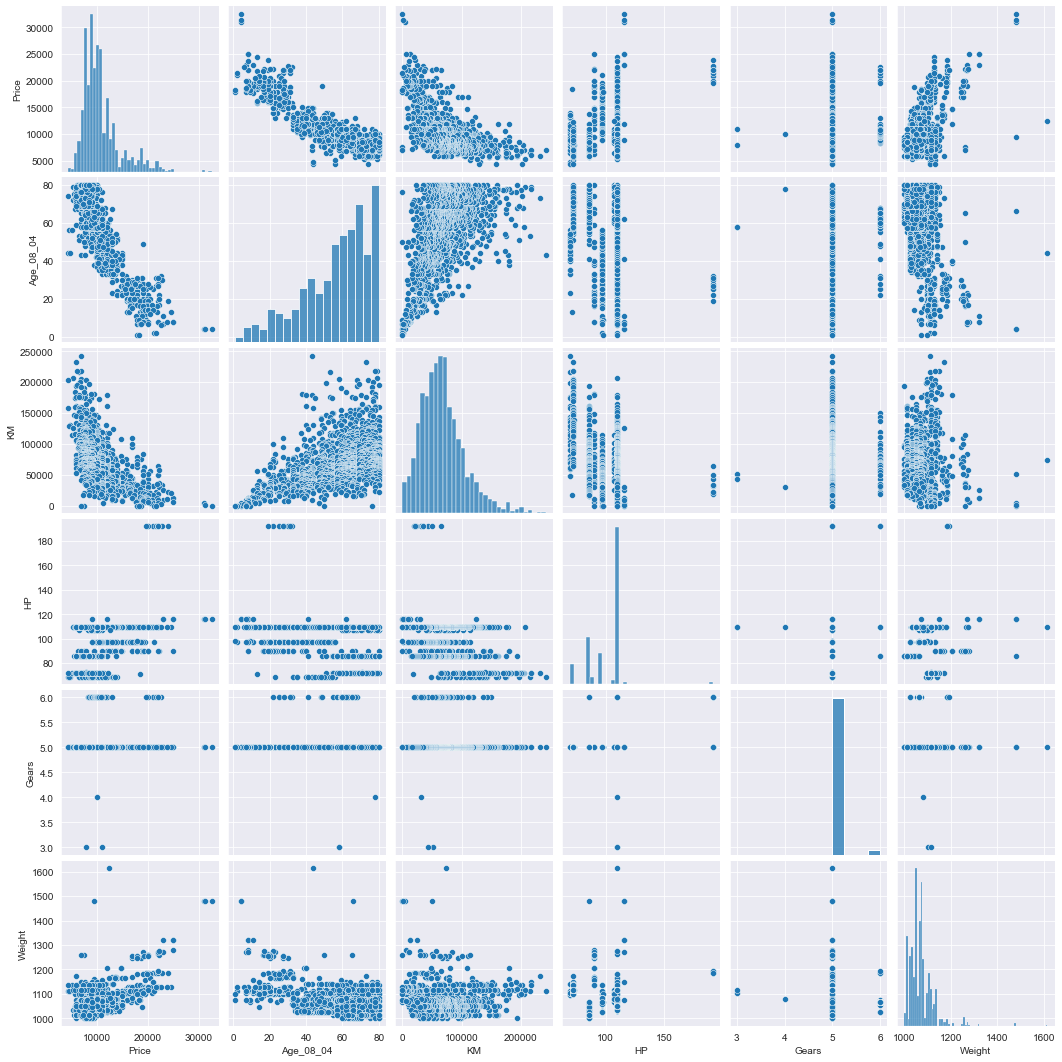

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(data3)

In [14]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+Gears+Weight+KM+HP',data=data3).fit()

In [15]:
model.params

Intercept   -7006.827227
Age_08_04    -122.243676
Gears         631.543519
Weight         18.557373
KM             -0.019996
HP             28.282948
dtype: float64

In [16]:
print(model.tvalues, '\n', model.pvalues)

Intercept    -5.355584
Age_08_04   -46.745013
Gears         3.262043
Weight       23.192000
KM          -16.550661
HP           10.881794
dtype: float64 
 Intercept     9.925271e-08
Age_08_04    2.772608e-290
Gears         1.132207e-03
Weight       2.904479e-101
KM            1.985300e-56
HP            1.496107e-26
dtype: float64


In [17]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8627968258548101, 0.86231709447668)

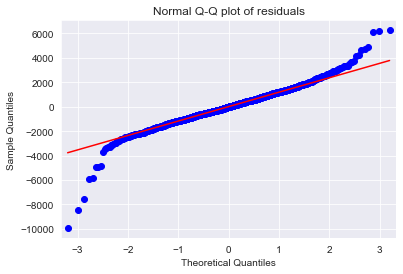

In [18]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   48,   49,   51,   52,
          53,   56,   58,   59,   61,   62,   63,   64,   65,   66,   68,
          69,   70,   72,   74,   75,   76,   77,   78,   80,   81,   83,
          84,   85,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  127,
         128,  134,  136,  138,  139,  141,  142,  143,  144,  146,  147,
         148,  149,  150,  151,  152,  153,  154,  156,  157,  158,  159,
         160,  161,  162,  163,  165,  166,  167,  168,  169,  170,  171,
         172,  173,  174,  175,  176,  177,  178,  179,  180,  181,  182,
         183,  190,  194,  196,  197,  201,  204,  205,  210,  211,  216,
         223,  230,  232,  233,  237, 

In [20]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

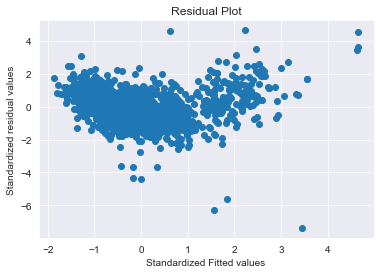

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

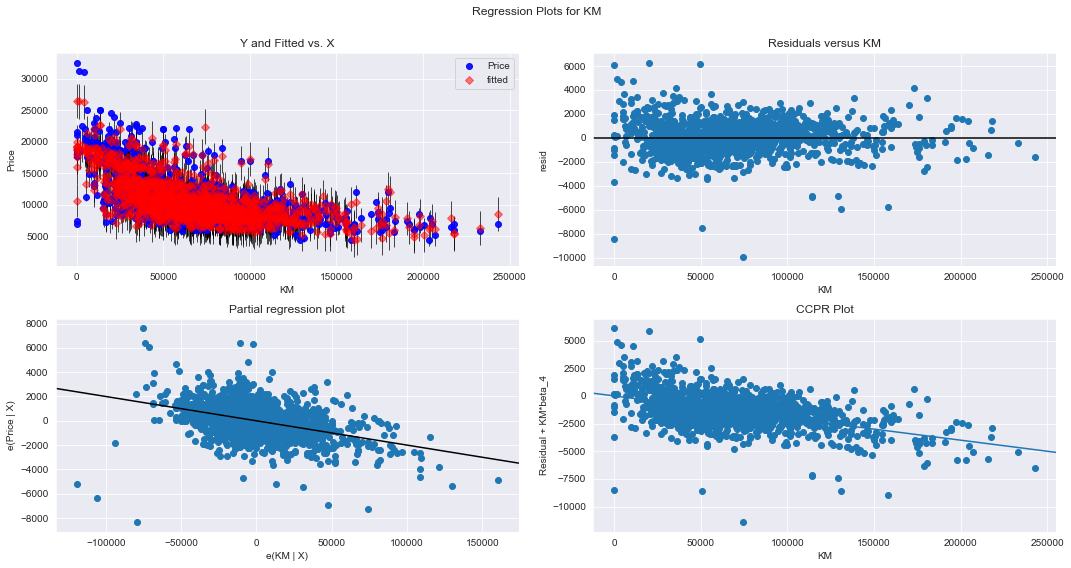

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

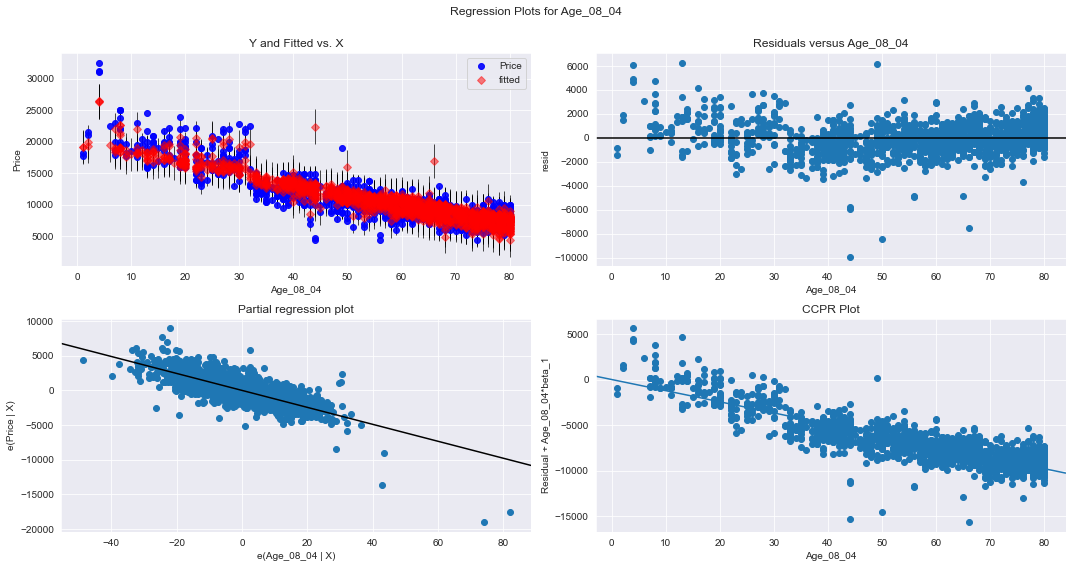

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

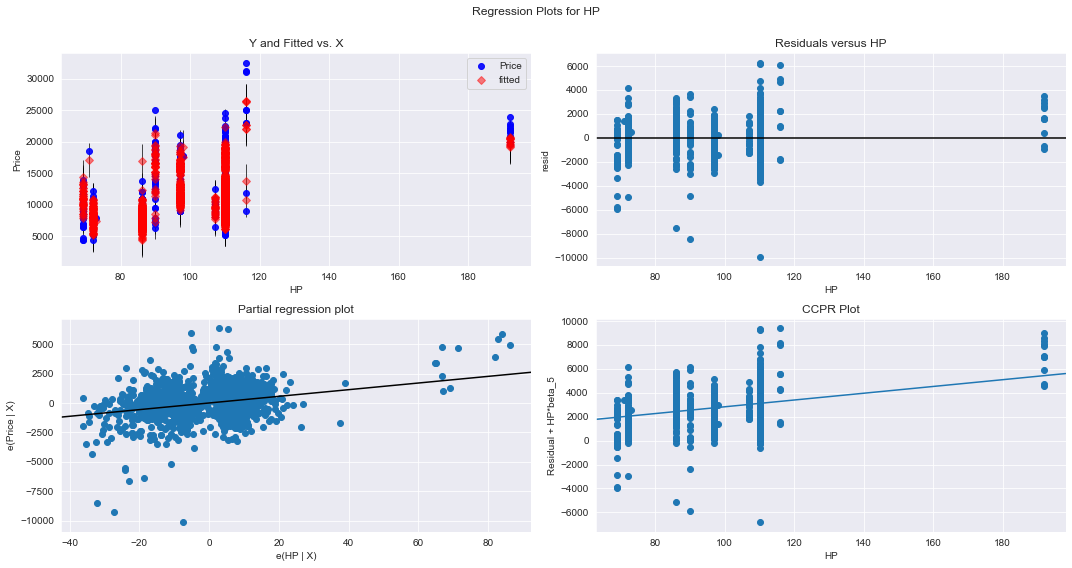

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

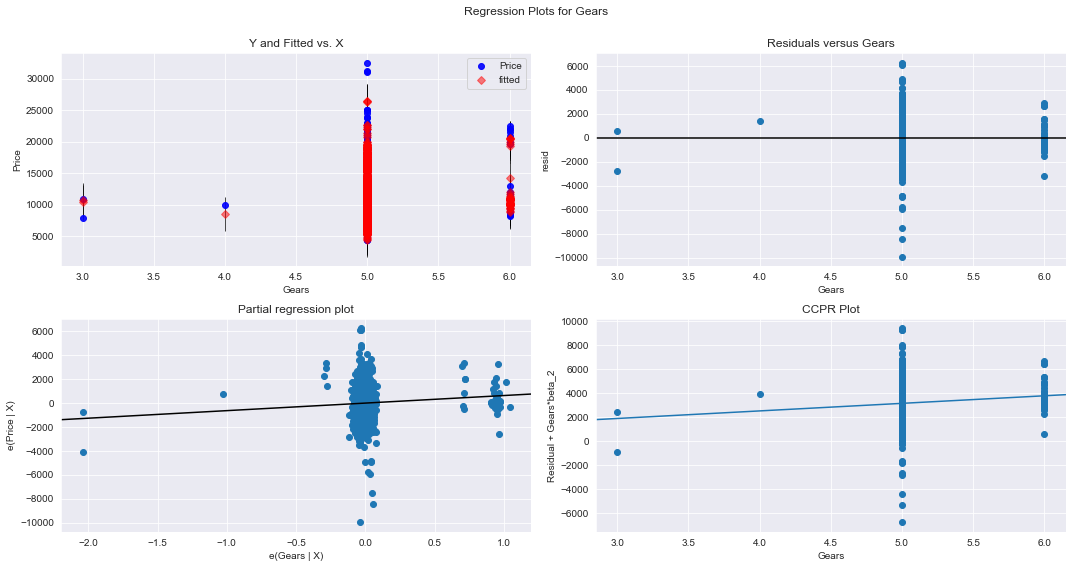

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

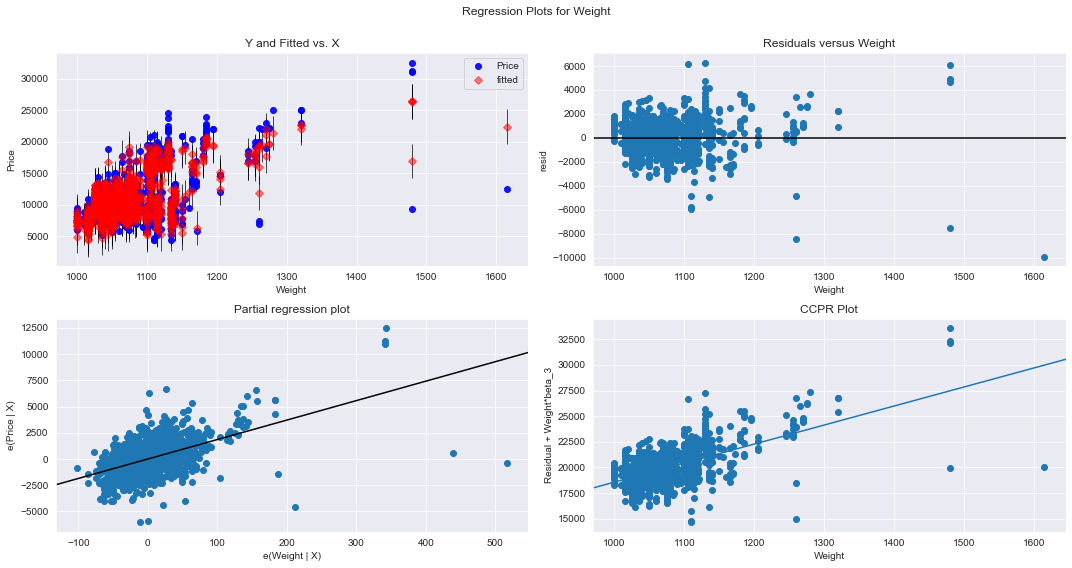

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [31]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance


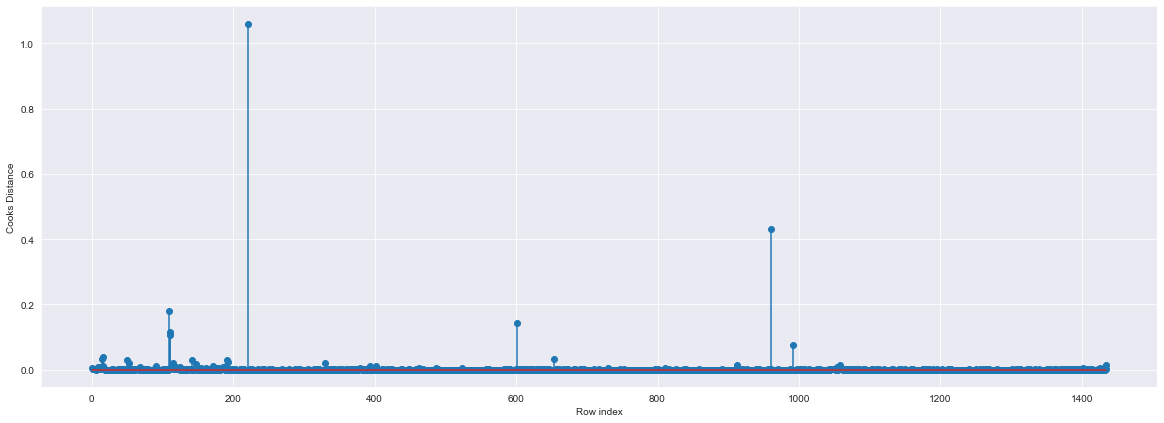

In [32]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:
(np.argmax(c),np.max(c))

(221, 1.0607870279727922)

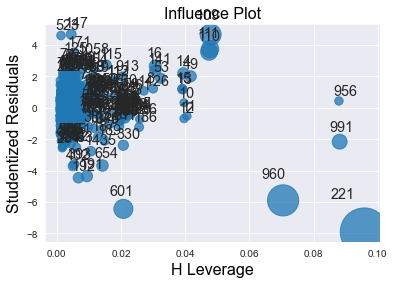

In [34]:
influence_plot(model)
plt.show()

In [36]:
data3[data3.index.isin([221,960])]

,Model,Price,Age_08_04,KM,HP,Gears,Weight
221,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,74172,110,5,1615
960,TOYOTA Corolla,9390,66,50806,86,5,1480


In [41]:
data4=data3.drop(data3.index[[221,960]], axis=0).reset_index()
data5=data4.drop('index', axis=1)
data5

,Model,Price,Age_08_04,KM,HP,Gears,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,5,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,5,1165
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,5,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,5,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,5,1170
...,...,...,...,...,...,...,...
1429,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,5,1025
1430,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,5,1015
1431,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,5,1015
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,5,1015


In [42]:
model1=smf.ols('Price~Age_08_04+KM+HP+Gears+Weight', data=data5).fit()

In [44]:
(model1.rsquared,model1.aic)

(0.8726263626033618, 24633.77225172694)

In [46]:
model1_influence=model1.get_influence()
(c1,_)=model1_influence.cooks_distance

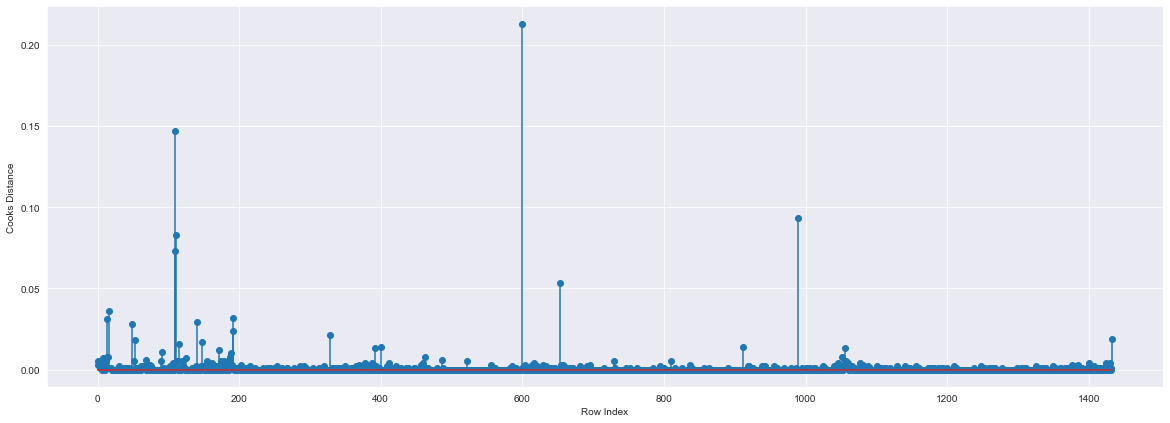

In [47]:
fig1= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data5)),np.round(c1,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
(np.argmax(c1),np.max(c1))

(600, 0.21300033979216582)

In [49]:
#New data for prediction
new_data=pd.DataFrame({"Age_08_04":22,"KM":50000,"HP":112,"Gears":5,"Weight":1150},index=[1])
model1.predict(new_data)

1    17068.599855
dtype: float64

In [64]:
Predicted =model1.predict(Toyoto)
y=np.round(Predicted,0)
print(y)

0       16759.0
1       16197.0
2       16757.0
3       16388.0
4       16240.0
         ...   
1431     8785.0
1432     8249.0
1433     8408.0
1434     8526.0
1435    11030.0
Length: 1436, dtype: float64


In [65]:
y1=pd.merge(Toyoto['Price'].reset_index(),y.reset_index())
y2=y1.drop('index', axis=1)
y2.columns=['Price','Predicted Price']
print(y2)

      Price  Predicted Price
0     13500          16759.0
1     13750          16197.0
2     13950          16757.0
3     14950          16388.0
4     13750          16240.0
...     ...              ...
1431   7500           8785.0
1432  10845           8249.0
1433   8500           8408.0
1434   7250           8526.0
1435   6950          11030.0

[1436 rows x 2 columns]
